<a href="https://colab.research.google.com/github/Tharuni-2310/ApexPlanet-WebPage/blob/main/Mask-Not.Mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Basic libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import kagglehub  # For downloading dataset

# Deep learning libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/face-mask-dataset


In [35]:
data = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train = data.flow_from_directory(
    os.path.join(path, 'data'), # Corrected path to include the 'data' subdirectory
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val = data.flow_from_directory(
    os.path.join(path, 'data'), # Corrected path to include the 'data' subdirectory
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


In [36]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    train,
    validation_data=val,
    epochs=10
)


Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 188s 982ms/step - accuracy: 0.9808 - loss: 0.0256 - val_accuracy: 1.0000 - val_loss: 3.8123e-07
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 176s 933ms/step - accuracy: 1.0000 - loss: 1.0161e-06 - val_accuracy: 1.0000 - val_loss: 1.3241e-07
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 175s 926ms/step - accuracy: 1.0000 - loss: 4.8911e-07 - val_accuracy: 1.0000 - val_loss: 6.7871e-08
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 183s 966ms/step - accuracy: 1.0000 - loss: 5.3264e-06 - val_accuracy: 1.0000 - val_loss: 2.7813e-08
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 176s 930ms/step - accuracy: 1.0000 - loss: 1.7603e-07 - val_accuracy: 1.0000 - val_loss: 1.9657e-08
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 183s 969ms/step - accuracy: 1.0000 - loss: 2.7468e-07 - val_accuracy: 1.0000 - val_loss: 1.4657e-08
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 175s 924ms/step - accuracy: 1.0000 - loss: 2.5321e-07 - val_accuracy: 1.0000 - val_loss: 1.0069e-08
Epoch 8/10
189/189 ━━━━━

In [9]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np
from tensorflow.keras.preprocessing import image


In [32]:
import os

# List the contents of the downloaded dataset directory
print(os.listdir(path))

# List the contents of subdirectories if they exist
for item in os.listdir(path):
    item_path = os.path.join(path, item)
    if os.path.isdir(item_path):
        print(f"\nContents of {item}:")
        print(os.listdir(item_path))

['data']

Contents of data:
['without_mask', 'with_mask']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


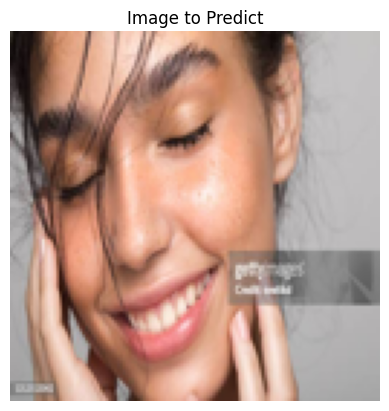

Prediction: Without Mask 😷❌


In [59]:
url = "https://media.gettyimages.com/id/1312113042/photo/young-woman-beauty-portrait.jpg?s=612x612&w=gi&k=20&c=4law-51hXJExS08Mf_mBo_uI5l806SwEesn-jRWDOK0="  # Replace with your Google image URL
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('RGB')
img = img.resize((128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0
prediction = model.predict(img_array)

# Display the image
plt.imshow(img)
plt.axis('off') # Hide axes
plt.title("Image to Predict")
plt.show()

if prediction[0][0] > 0.5:
    print("Prediction: Without Mask 😷❌")
else:
    print("Prediction: With Mask 😷✅")

Epoch 1: Training Accuracy = 0.9967, Validation Accuracy = 1.0000
Epoch 2: Training Accuracy = 1.0000, Validation Accuracy = 1.0000
Epoch 3: Training Accuracy = 1.0000, Validation Accuracy = 1.0000
Epoch 4: Training Accuracy = 1.0000, Validation Accuracy = 1.0000
Epoch 5: Training Accuracy = 1.0000, Validation Accuracy = 1.0000
Epoch 6: Training Accuracy = 1.0000, Validation Accuracy = 1.0000
Epoch 7: Training Accuracy = 1.0000, Validation Accuracy = 1.0000
Epoch 8: Training Accuracy = 1.0000, Validation Accuracy = 1.0000
Epoch 9: Training Accuracy = 1.0000, Validation Accuracy = 1.0000
Epoch 10: Training Accuracy = 1.0000, Validation Accuracy = 1.0000


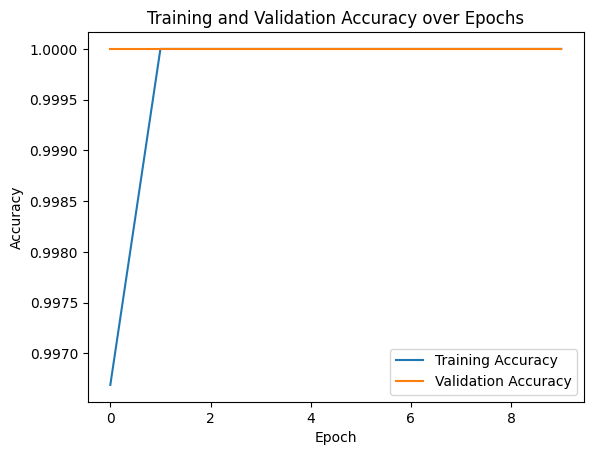

In [46]:
# Get training and validation accuracy from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Print the accuracy for each epoch
for epoch, (train_acc, val_acc) in enumerate(zip(train_accuracy, val_accuracy)):
    print(f"Epoch {epoch+1}: Training Accuracy = {train_acc:.4f}, Validation Accuracy = {val_acc:.4f}")

# You can also plot the accuracy over epochs to visualize the performance
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()